In [8]:
CSV_DATA_FILEPATH = "data\\result.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import requests
from io import BytesIO

In [4]:
df = pd.read_csv(CSV_DATA_FILEPATH, delimiter='|', encoding_errors='ignore')

In [29]:
df.head()

,site_name,url,picture_url,name,flowers,price
0,flowers.ua,https://flowers.ua/en/buket-kadryil,https://flowers.ua/images/Flowers/zoom/1/0/366...,Flowers in a box Cadrille,"11 red roses 60 cm, 10 white roses 60 cm, 10 c...",4559uah
1,flowers.ua,https://flowers.ua/en/buket-korolivska-gratsiya,https://flowers.ua/images/Flowers/zoom/1/0/362...,"Flowers in a box ""Royal Grace""","15 white roses, 9 cream roses, 18 white spray ...",8299uah
2,flowers.ua,https://flowers.ua/en/korzina-rozovyy-vihr,https://flowers.ua/images/Flowers/zoom/1/0/359...,"Basket ""Pink whirlwind""","9 branches of spray cream roses, 10 branches o...",3259uah
3,flowers.ua,https://flowers.ua/en/tsvety-v-korobke-moi-bez...,https://flowers.ua/images/Flowers/zoom/1/0/359...,Flowers in the box My sense of boundlessness,"29 white roses, 12 spray cream roses, 18 spray...",9259uah
4,flowers.ua,https://flowers.ua/en/buket-51-krasnaya-i-bela...,https://flowers.ua/images/Flowers/zoom/1/0/353...,"Bouquet ""51 red and white roses""","26 red roses, 25 white roses, decoration.",3959uah


In [17]:
def display_image(df, index):
    response = requests.get(df.loc[index, 'picture_url'])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')

    title = df.loc[index, 'site_name'] + " - " + df.loc[index, 'name'] + "\nContent: " + df.loc[index, 'flowers'] + "\nPrice: " + df.loc[index, 'price']
    plt.title(title)

    plt.show()

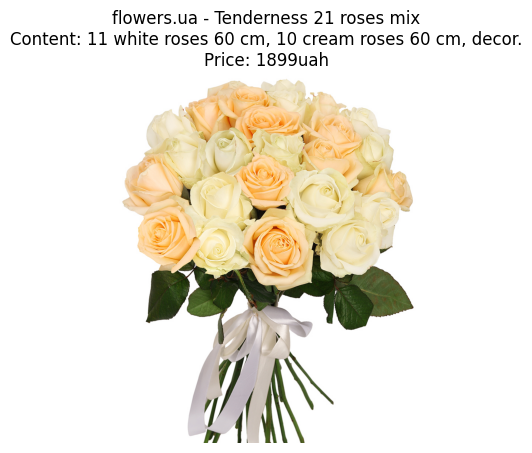

In [38]:
display_image(df, 70)

In [22]:
df.isna().sum()

site_name       0
url             0
picture_url     5
name            5
flowers         5
price          10
dtype: int64

In [23]:
df.shape

(189, 6)

In [24]:
df = df.dropna(subset=['picture_url', 'flowers'])
df.shape

(184, 6)

In [25]:
df.isna().sum()

site_name      0
url            0
picture_url    0
name           0
flowers        0
price          5
dtype: int64